## Exploratory Data Analysis

### 1. Data Cleaning and Preparation:

In [3]:
import pandas as pd
df = pd.read_csv("Cardiotocographic.csv")
df.head(10)

# Imported pandas library for handling dataset

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73.0,0.5,43.0,2.4,64.000000,0.999926,2.000000
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17.0,2.1,0.0,10.4,130.000000,0.000000,1.000000
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16.0,2.1,0.0,13.4,130.000000,0.000000,1.000000
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.000000,16.0,2.4,0.0,23.0,117.000000,1.000000,1.000000
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16.0,2.4,0.0,19.9,117.000000,1.000000,1.000000
5,134.000000,0.001116,0.0,0.010493,0.009444,0.0,0.002099,26.0,5.9,0.0,0.0,150.000000,0.000000,3.000000
6,134.000000,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29.0,6.3,0.0,0.0,150.000000,0.000000,-1.025988
7,122.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83.0,0.5,6.0,15.6,69.920261,1.000000,3.000000
8,122.000000,0.038567,0.0,0.001517,0.000000,0.0,0.000000,84.0,0.5,5.0,13.6,68.000000,1.000000,3.000000
9,122.000000,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86.0,0.3,6.0,10.6,68.000000,1.000000,3.000000


In [4]:
df.isnull().sum()

# Columns LB, AC, DS, DP, MLTV, Width, Tendency, NSP each have 20–21 missing values.
# Other variables (FM, UC, DL, ASTV, MSTV, ALTV) have no missing values.

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
# Fill missing values with column median

df = df.fillna(df.median(numeric_only=True))
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
print(df.isnull().sum())

# No missing values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [7]:
df.info()

# All columns are of numeric type. so, no datatype correction needed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


### Detecting Outliers

In [8]:
# Function to count outliers using the IQR method
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # identifing values outside the IQR bounds
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    # printing number of outliers detected in each column
    print(f"{col}: {len(outliers)} outliers")

# The dataset does contain outliers, and the table below shows exactly 
# how many outliers were detected in each column using the IQR (Interquartile Range) method.

LB: 10 outliers
AC: 43 outliers
FM: 347 outliers
UC: 13 outliers
DL: 125 outliers
DS: 120 outliers
DP: 284 outliers
ASTV: 10 outliers
MSTV: 80 outliers
ALTV: 318 outliers
MLTV: 81 outliers
Width: 10 outliers
Tendency: 10 outliers
NSP: 559 outliers


### Treating outliers

In [9]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap(clip) outliers to the lower and upper bounds
    df[col] = df[col].clip(lower, upper)

print("\nOutliers have been covered successfully.")

# Outliers were treated using capping. 
# Any value below the lower bound was replaced with the lower limit, 
# and any value above the upper bound was replaced with the upper limit.
# This method preserves all rows while reducing the impact of extreme values.


Outliers have been covered successfully.


### 2. Statistical Summary:

In [10]:
Mean = df.mean()
print(Mean)

# calculates average value of each column

LB          133.290331
AC            0.003132
FM            0.001568
UC            0.004362
DL            0.001770
DS            0.000000
DP            0.000000
ASTV         46.981873
MSTV          1.304644
ALTV          6.691678
MLTV          8.007471
Width        70.287203
Tendency      0.316537
NSP           1.000000
dtype: float64


In [11]:
Median = df.median()
print(Median)

# gives middle value of each cloumn

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64


In [12]:
std = df.std()
print(std)

# shows how much data varies from the mean

LB           9.930268
AC           0.003828
FM           0.002485
UC           0.003001
DL           0.002668
DS           0.000000
DP           0.000000
ASTV        17.612745
MSTV         0.781091
ALTV        10.378400
MLTV         5.047078
Width       39.571995
Tendency     0.622406
NSP          0.000000
dtype: float64


In [13]:
# Interquartile Range

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1
print(IQR)

# tells how spread out the middle 50% of the data is and also IQR used for detecting outliers in data.

LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


### Summary
#### LB (Baseline FHR) averages around 133 bpm, normal range for fetal heart rate.
#### ASTV (Abnormal Short Term Variability) has high spread indicates presence of abnormal fetal states.
#### AC, UC, DS, DP show low mean values these events do not occur continuously.
#### Abnormal long-term variability (ALTV) is highly skewed, suggesting some extreme high-risk cases.
#### Width shows very high variation, meaning the dataset likely contains outliers.

## 3. Data Visualization:
### Histogram

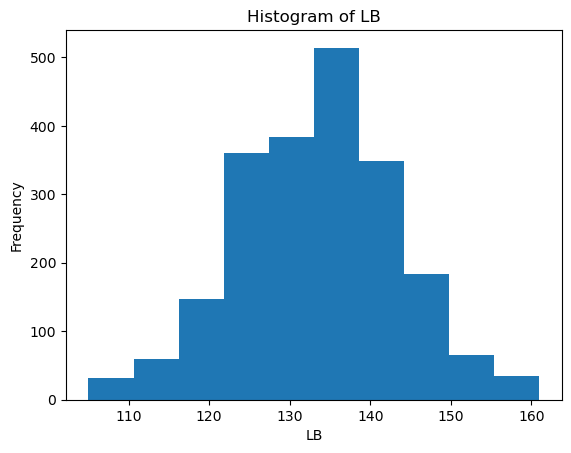

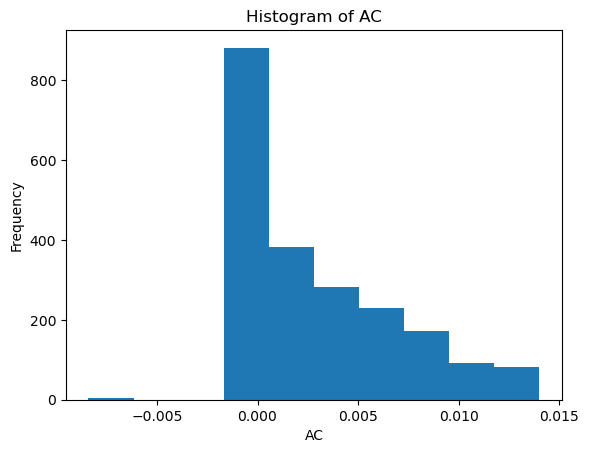

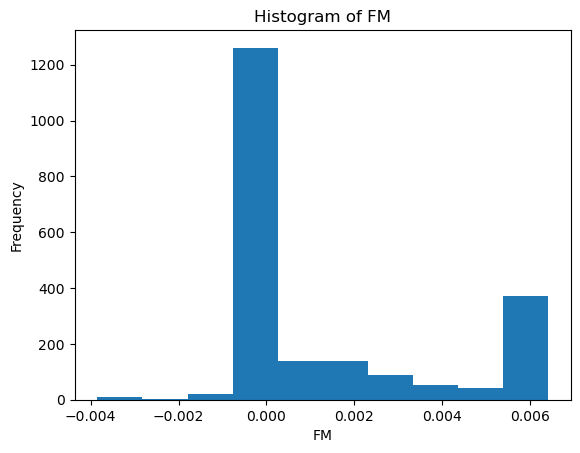

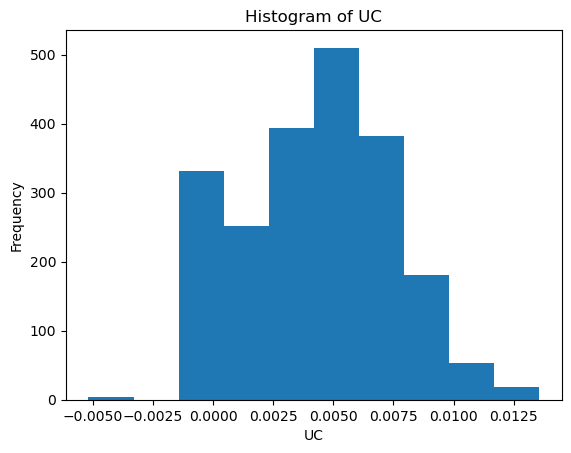

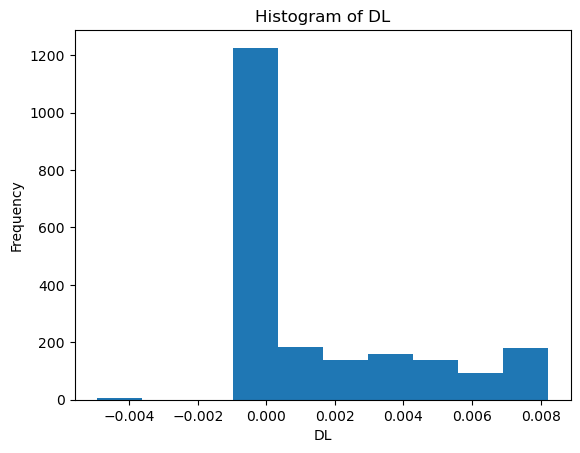

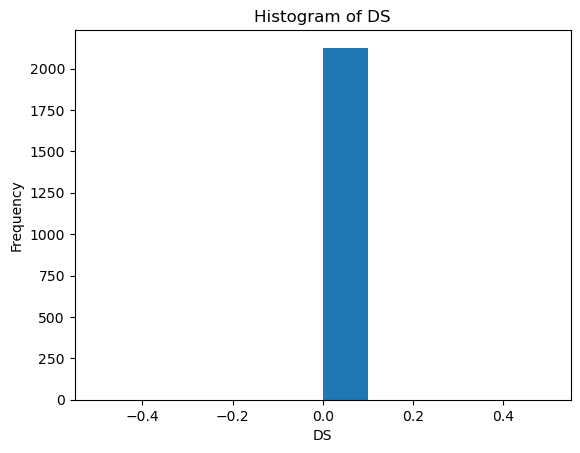

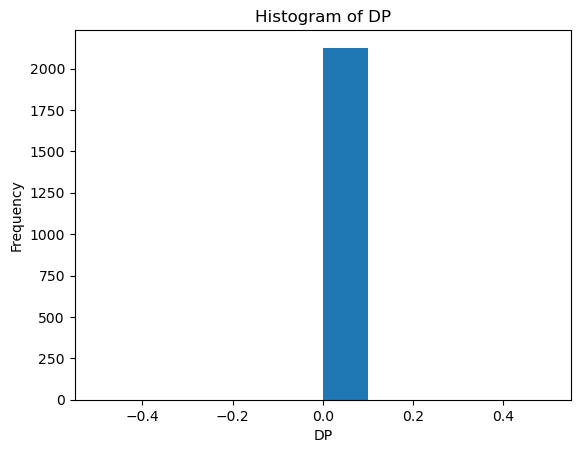

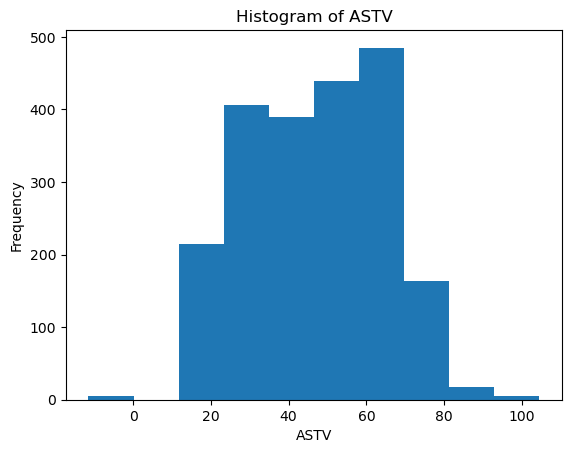

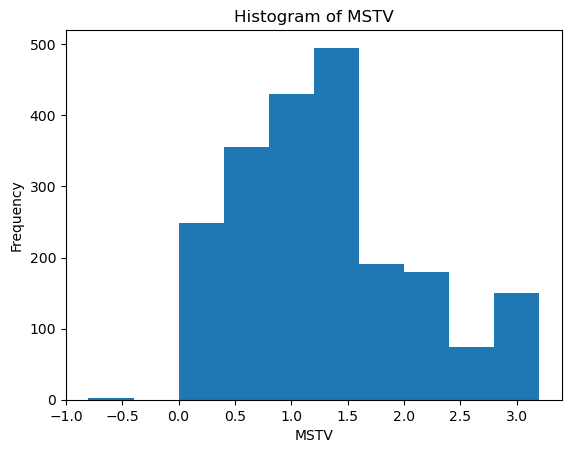

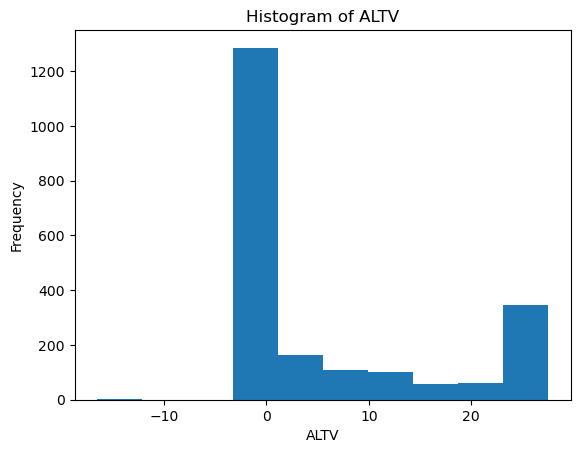

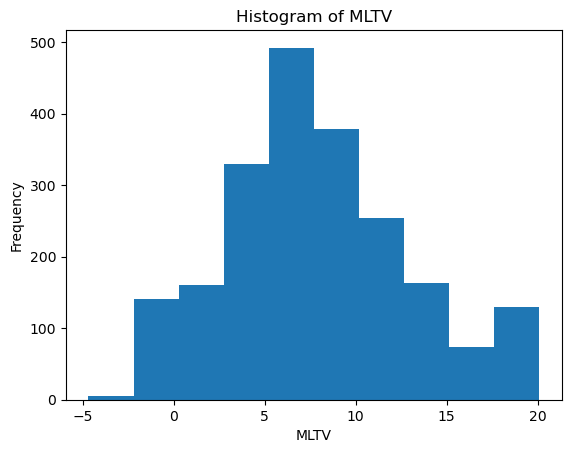

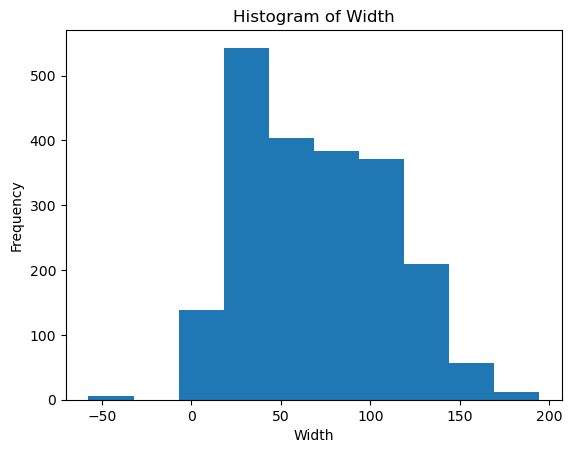

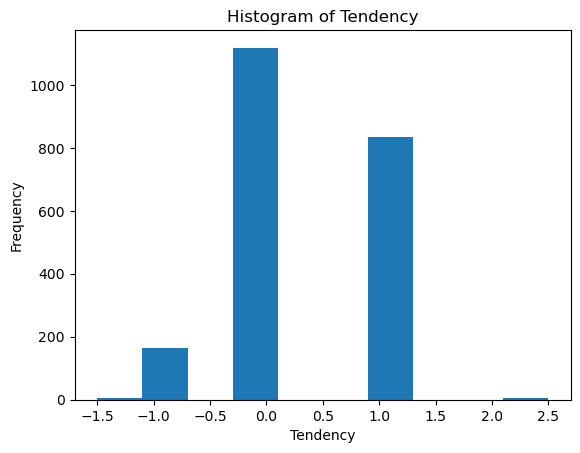

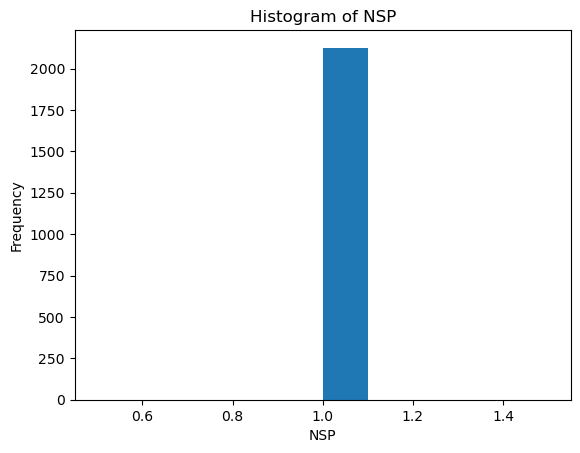

In [14]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64']).columns

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col])
    
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Histograms show that most variables (AC, DL FM, MSTV, ALTV, MLTV, Width, Tendency) are right-skewed.
# only ASTV variable is left-skewed.
# LB, DS, DP, NSP variables are Symmetric.

### Bar charts

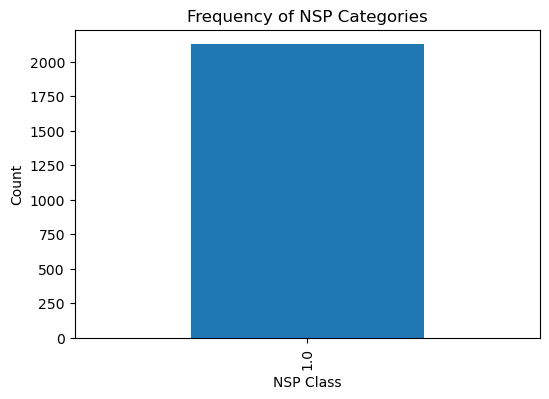

In [15]:
# Bar chart to show the count of each NSP category

plt.figure(figsize=(6,4))
df['NSP'].value_counts().plot(kind='bar')
plt.title("Frequency of NSP Categories")        # title of the chart
plt.xlabel("NSP Class")                         # X-axis label
plt.ylabel("Count")                             # Y-axis label
plt.show()

# counts how many times each NSP class appears in the dataset and show vertical bar chart.

### Scatter Plot

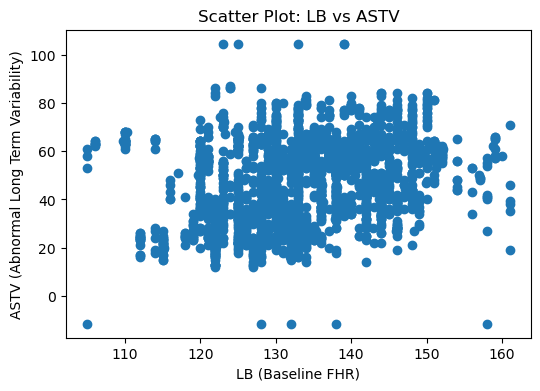

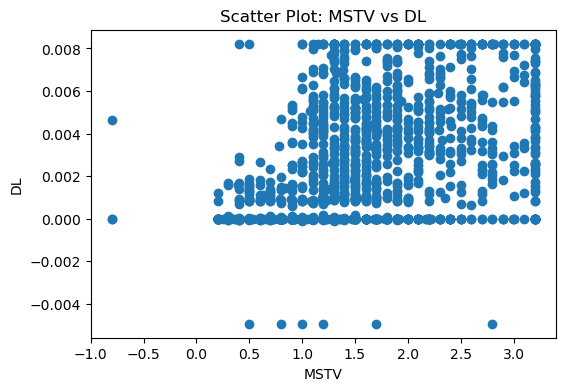

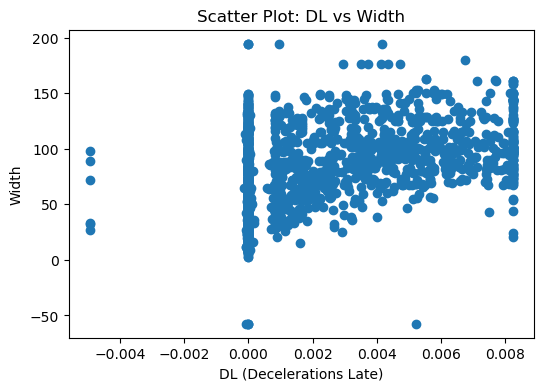

In [16]:
import matplotlib.pyplot as plt

# Scatter Plot 1: # Scatter plot to tells relationship between LB and ASTV
plt.figure(figsize=(6,4))
plt.scatter(df['LB'], df['ASTV'])
plt.title("Scatter Plot: LB vs ASTV") # title of the scatter plot
plt.xlabel("LB (Baseline FHR)")       # x-axis label
plt.ylabel("ASTV (Abnormal Long Term Variability)")   # y-axis label
plt.show()

# Scatter Plot 2: Scatter plot to tells relationship MSTV and DL
plt.figure(figsize=(6,4))
plt.scatter(df['MSTV'], df['DL'])
plt.title("Scatter Plot: MSTV vs DL") # title of the scatter plot
plt.xlabel("MSTV")                    # x-axis label
plt.ylabel("DL")                      # y-axis label
plt.show()

# Scatter Plot 3: Scatter plot to tells relationship Decelerations Late and Width
plt.figure(figsize=(6,4))
plt.scatter(df['DL'], df['Width'])     
plt.title("Scatter Plot: DL vs Width") # title of the scatter plot
plt.xlabel("DL (Decelerations Late)")  # x-axis label
plt.ylabel("Width")                    # y-axis label
plt.show()


### Correlation Heatmap

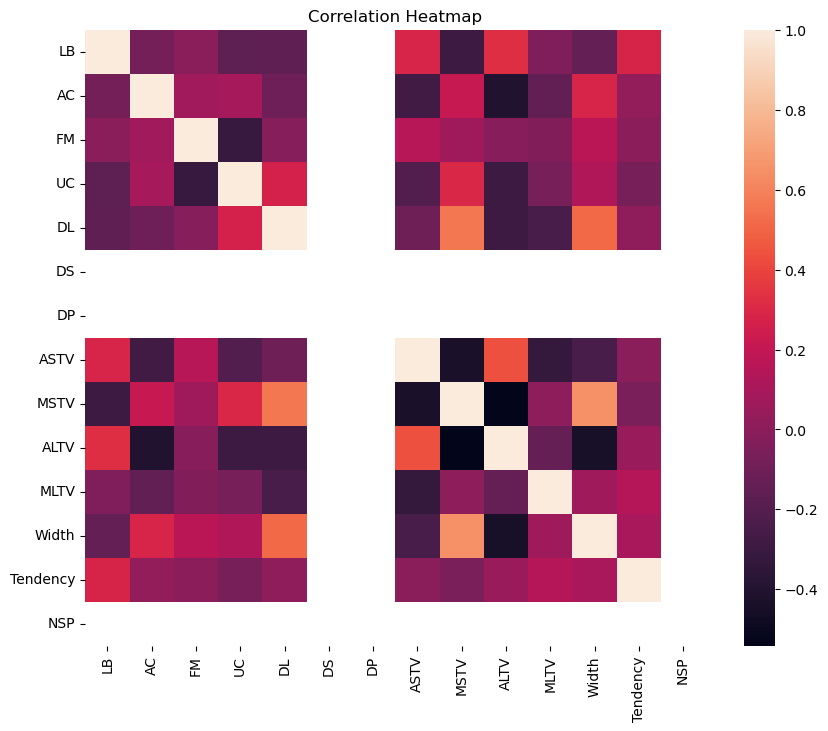

In [17]:
# Heatmap to visualize correlation between all numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title("Correlation Heatmap")
plt.show()

# shows strong positive correlation and strong negative correlation between variables

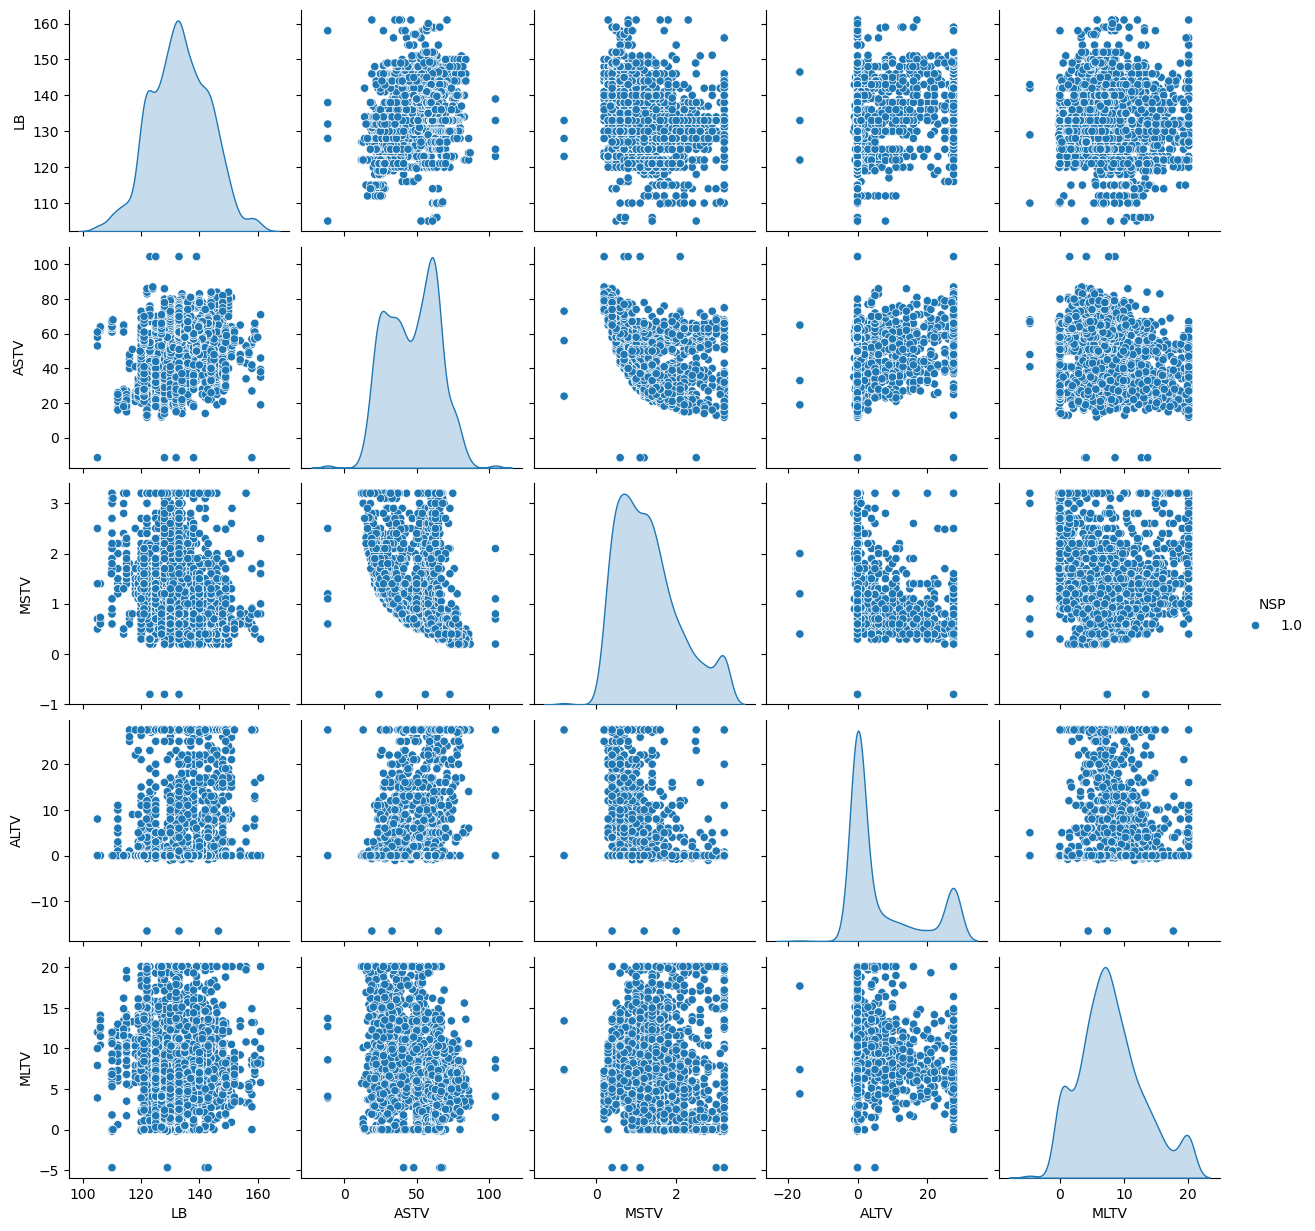

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a few important features for pairplot
pair_cols = ['LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'NSP']

sns.pairplot(df[pair_cols], hue='NSP')
plt.show()

# hue='NSP' - Colors points based on fetal state class (Normal / Suspect / Pathological)

In [19]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.080759,-0.006929,-0.162811,-0.156260,NaN,NaN,0.285623,-0.295600,0.322431,-0.042578,-0.140015,0.280796,NaN
AC,-0.080759,1.000000,0.075669,0.093614,-0.103048,NaN,NaN,-0.272452,0.216377,-0.408012,-0.152012,0.283749,0.030557,NaN
FM,-0.006929,0.075669,1.000000,-0.317265,-0.017610,NaN,NaN,0.156351,0.070300,-0.013420,-0.037001,0.164579,0.000606,NaN
UC,-0.162811,0.093614,-0.317265,1.000000,0.268605,NaN,NaN,-0.215984,0.297843,-0.293340,-0.074192,0.131701,-0.074168,NaN
DL,-0.156260,-0.103048,-0.017610,0.268605,1.000000,NaN,NaN,-0.111624,0.566340,-0.295886,-0.242728,0.514538,0.014407,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.285623,-0.272452,0.156351,-0.215984,-0.111624,NaN,NaN,1.000000,-0.433844,0.439040,-0.324702,-0.241119,-0.009754,NaN
MSTV,-0.295600,0.216377,0.070300,0.297843,0.566340,NaN,NaN,-0.433844,1.000000,-0.541156,0.011105,0.645744,-0.064733,NaN
ALTV,0.322431,-0.408012,-0.013420,-0.293340,-0.295886,NaN,NaN,0.439040,-0.541156,1.000000,-0.133070,-0.438860,0.052496,NaN


### 4. Pattern Recognition and Insights:

#### 1. Identify any correlations between variables and discuss their potential implications:
#### Due to mixed and mostly non-linear correlations, advanced machine-learning models (Random Forest, SVM, ANN) are more suitable than simple linear models.
#### 2. Look for trends or patterns over time if temporal data is available:
#### Observing variability patterns over time can help classify fetal status and detect fetal distress early, improving decision-making in prenatal care.

### 5. Conclusion:

#### The dataset shows a mix of low to moderate correlations, meaning most variables behave independently rather than linearly dependent on each other.
#### Some feature pairs such as MSTV–Width, MSTV–DL, and ASTV–ALTV have strong correlations, suggesting they reflect similar physiological behavior.
#### Several variables (ALTV, Width) show high variability, indicating a wide range of fetal heart activity and possible presence of outliers.
#### Variables like DS, DP, NSP show constant or categorical information, leading to NaN correlations since they don’t vary numerically.
#### Machine-learning models like Random Forest, SVM, or ANN are more suitable than linear regression due to non-linear feature relationships.
#### variable selection or PCA may be needed to reduce multicollinearity from highly correlated features.
#### Outlier treatment is important to improve model accuracy.
#### Low-variability features should be evaluated for removal to reduce noise and computation cost.